In [1]:
import pandas as pd
object_df = pd.read_csv(filepath_or_buffer='/kaggle/input/list-of-artificial-objects-on-the-moon/List of Artificial Objects on the Moon.csv',
                       index_col=[0], nrows=88)
object_df['Mass (lb)'] = object_df['Mass (lb)'].apply(func=lambda x: int(x.replace('<', '').replace('>', '').replace(',', '')))
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artificial object  88 non-null     object
 1   Country            88 non-null     object
 2   Year               88 non-null     int64 
 3   Mass (lb)          88 non-null     int64 
 4   Mass (kg)          88 non-null     object
 5   Status             88 non-null     object
 6   Location           87 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.5+ KB


In [2]:
import numpy as np
# now we can split our coordinates into latitude and longitude
def get_coord(arg, index):
    if not isinstance(arg, str):
        return arg
    if arg.startswith('Unk'):
        return np.nan
    pieces = arg.split()
    if len(pieces) <= index:
        return np.nan
    return pieces[index].strip()

object_df['location'] = object_df['Location'].apply(func=lambda x: str(x).split('/')[0])
object_df['latitude_str'] = object_df['location'].apply(func=get_coord, args=(0, ))
object_df['longitude_str'] = object_df['location'].apply(func=get_coord, args=(1, ))

object_df.head(n=20)


,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location,location,latitude_str,longitude_str
0,Luna 2,Soviet Union,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,29°06′N 0°00′E﻿,29°06′N,0°00′E﻿
1,Luna 2 Third stage of Vostok rocket,Soviet Union,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,29°06′N 0°00′E﻿,29°06′N,0°00′E﻿
2,Ranger 4,United States,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W,15°30′S 130°42′W﻿,15°30′S,130°42′W﻿
3,Ranger 6,United States,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E,9°21′29″N 21°28′48″E﻿,9°21′29″N,21°28′48″E﻿
4,Ranger 7,United States,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W,10°38′S 20°36′W﻿,10°38′S,20°36′W﻿
5,Luna 5,Soviet Union,1965,3250,1474,Crashed,8°N 23°W﻿ / ﻿8°N 23°W,8°N 23°W﻿,8°N,23°W﻿
6,Luna 7,Soviet Union,1965,3316,1504,Crashed,9°48′N 47°48′W﻿ / ﻿9.8°N 47.8°W,9°48′N 47°48′W﻿,9°48′N,47°48′W﻿
7,Luna 8,Soviet Union,1965,220,100,Crashed,9°06′N 63°18′W﻿ / ﻿9.1°N 63.3°W,9°06′N 63°18′W﻿,9°06′N,63°18′W﻿
8,Ranger 8,United States,1965,809,367,Intentionally crashed,2°38′17″N 24°47′13″E﻿ / ﻿2.638°N 24.787°E,2°38′17″N 24°47′13″E﻿,2°38′17″N,24°47′13″E﻿
9,Ranger 9,United States,1965,809,367,Intentionally crashed,12°49′41″S 2°23′13″W﻿ / ﻿12.828°S 2.387°W,12°49′41″S 2°23′13″W﻿,12°49′41″S,2°23′13″W﻿


<Axes: ylabel='Frequency'>

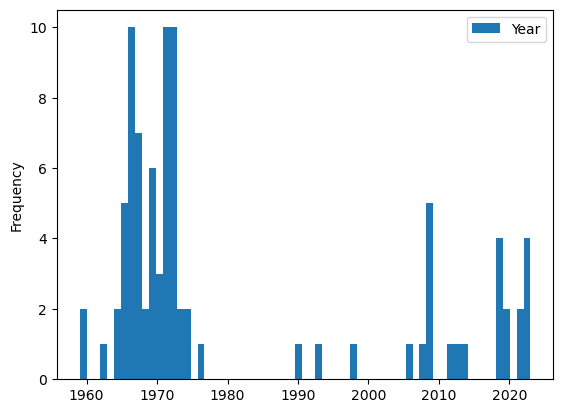

In [3]:
object_df['Year'].plot.hist(bins=1 + object_df['Year'].max() - object_df['Year'].min(), legend=True)

<Axes: ylabel='Frequency'>

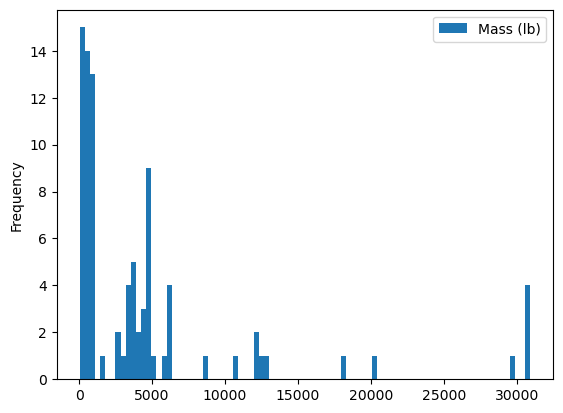

In [4]:
object_df['Mass (lb)'].plot.hist(bins=88, legend=True)

In [5]:
object_df['Mass (kg)'].values

array(['390', '9100', '331', '381', '365', '1474', '1504', '100', '367',
       '367', '100', '1600', '1640', '1670', '270', '113', '386', '292',
       '385', '386', '281', '386', '283', '104', '386', '281', '282',
       '290', '1670', '2211', '2034', '2718', '2184', '221', '2164',
       '1380', '5600', '13454', '1880', '1880', '14016', '2144', '2132',
       '14036', '2809', '210', '2132', '36', '<5,727', '14002', '2765',
       '210', '2138', '36', '13960', '2798', '210', '2150', '4850', '328',
       '4000', '5600', '<5,800', '12', '143', '126', '307', '35', '53',
       '2000', '1,984[76]', '700', '2270', '133', '1200', '248', '1200',
       '150', '47', '1471', '<8,200', '>882', '2800', '14', '340', '340',
       '1750', '1752'], dtype=object)

In [6]:
# every other row is garbage so we drop them
mission_df = pd.read_csv(filepath_or_buffer='/kaggle/input/list-of-artificial-objects-on-the-moon/Missions by date.csv', index_col=[0]).iloc[::2]
mission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 338
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mission         170 non-null    object
 1   Spacecraft      170 non-null    object
 2   Launch date     170 non-null    object
 3   Carrier rocket  170 non-null    object
 4   Operator        170 non-null    object
 5   Mission type    170 non-null    object
 6   Outcome         98 non-null     object
dtypes: object(7)
memory usage: 10.6+ KB


In [7]:
mission_df.head(n=10)

,Mission,Spacecraft,Launch date,Carrier rocket,Operator,Mission type,Outcome
0,Pioneer 0 (Able I)[3],Pioneer 0,17 August 1958,Thor DM-18 Able I[3],USAF,Orbiter,NaN
2,Luna E-1 No.1,Luna E-1 No.1,23 September 1958,Luna,OKB-1,Impactor,NaN
4,Pioneer 1 (Able II)[3],Pioneer 1,11 October 1958,Thor DM-18 Able I[3],NASA,Orbiter,NaN
6,Luna E-1 No.2,Luna E-1 No.2,11 October 1958,Luna,OKB-1,Impactor,NaN
8,Pioneer 2 (Able III),Pioneer 2,8 November 1958,Thor DM-18 Able I,NASA,Orbiter,NaN
10,Luna E-1 No.3,Luna E-1 No.3,4 December 1958,Luna,OKB-1,Impactor,NaN
12,Pioneer 3,Pioneer 3,6 December 1958,Juno II,NASA,Flyby,NaN
14,Luna 1 (E-1 No.4),Luna 1,2 January 1959,Luna,OKB-1,Impactor,NaN
16,Pioneer 4,Pioneer 4,3 March 1959,Juno II,NASA,Flyby,NaN
18,E-1A No.1,E-1A No.1,18 June 1959,Luna,OKB-1,Impactor,NaN


In [8]:
mission_df['Operator'].value_counts()

NASA                                                                                                                                                                                                                    33
Lavochkin                                                                                                                                                                                                               16
OKB-1                                                                                                                                                                                                                   12
CNSA                                                                                                                                                                                                                     7
ISRO                                                                                                                        